In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
# Read the CSV file
csv_file_path = '/content/drive/MyDrive/datasets/insurance_data.csv'
df = pd.read_csv(csv_file_path)

# Perform operations on the dataframe
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [5]:
len(df.age)

27

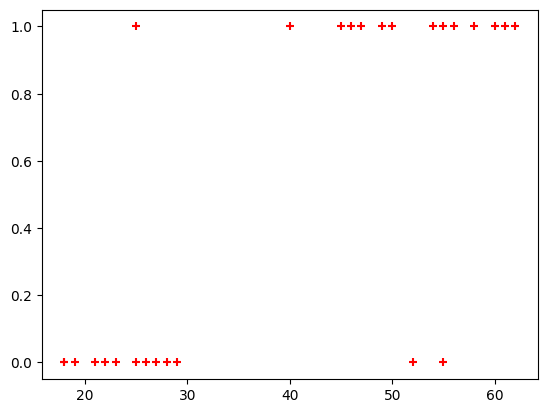

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

In [7]:
df.shape

(27, 2)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1, random_state=42)

In [23]:
X_test

,age
8,62
13,29
9,61


In [24]:
X_train

,age
21,26
0,22
11,28
16,25
17,58
12,27
24,50
1,25
4,46
5,56


In [25]:
y_test

8     1
13    0
9     1
Name: bought_insurance, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
model.predict(X_test)

array([1, 0, 1])

In [29]:
model.score(X_test, y_test)

1.0

In [31]:
 model.predict_proba(X_test) # (will not buy insurance, will buy insurance)

array([[0.04794221, 0.95205779],
       [0.77002443, 0.22997557],
       [0.0540927 , 0.9459073 ]])

In [34]:
model.predict([[56]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [183]:
# Read the CSV file
csv_file_path = '/content/drive/MyDrive/datasets/HR_comma_sep.csv'
df_hr = pd.read_csv(csv_file_path)

# Perform operations on the dataframe
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<BarContainer object of 2 artists>

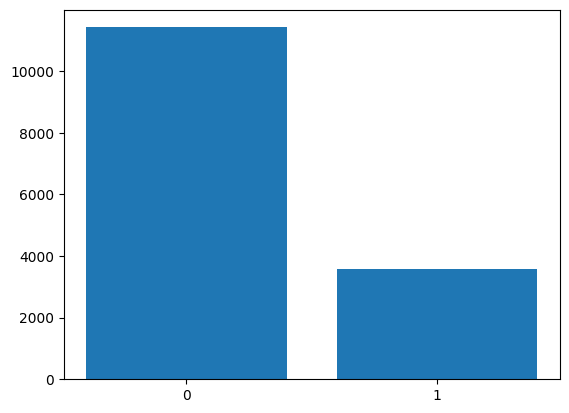

In [184]:
value_counts = df_hr['left'].value_counts()
plt.xticks([0,1])
plt.bar(value_counts.index, value_counts.values)

In [185]:
value_counts

0    11428
1     3571
Name: left, dtype: int64

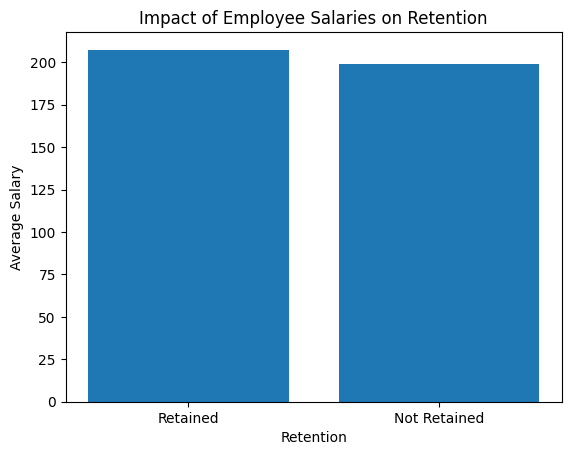

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with 'salary' and 'retention' columns

avg_salary_retained = df_hr[df_hr['left'] == 1]['average_montly_hours'].mean()
avg_salary_not_retained = df_hr[df_hr['left'] == 0]['average_montly_hours'].mean()

retention_labels = ['Retained', 'Not Retained']
avg_salary_values = [avg_salary_retained, avg_salary_not_retained]

plt.bar(retention_labels, avg_salary_values)
plt.xlabel('Retention')
plt.ylabel('Average Salary')
plt.title('Impact of Employee Salaries on Retention')
plt.show()


In [187]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [188]:
df_hr['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

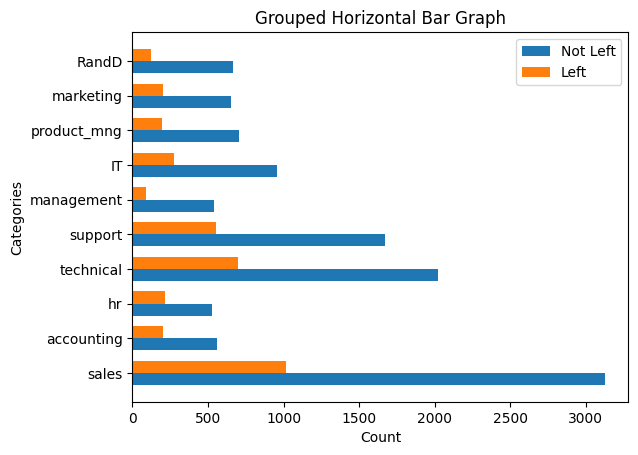

In [189]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = df_hr['Department'].unique()
values1 = []  # Values for the first group of bars
values2 = []  # Values for the second group of bars

for i in categories:
    values_notleft = df_hr[(df_hr['Department'] == i) & (df_hr['left'] == 0)]['Department'].count()
    values_left = df_hr[(df_hr['Department'] == i) & (df_hr['left'] == 1)]['Department'].count()
    values1.append(values_notleft)
    values2.append(values_left)

# Set the height of each bar
bar_height = 0.35

# Calculate the center position of each bar group
bar_positions = np.arange(len(categories))

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the first group of bars horizontally
ax.barh(bar_positions - bar_height/2, values1, height=bar_height, label='Not Left')

# Plot the second group of bars horizontally
ax.barh(bar_positions + bar_height/2, values2, height=bar_height, label='Left')

# Customize the plot
ax.set_xlabel('Count')
ax.set_ylabel('Categories')
ax.set_title('Grouped Horizontal Bar Graph')
ax.set_yticks(bar_positions)
ax.set_yticklabels(categories)
ax.legend()

# Show the plot
plt.show()


In [190]:
value_counts = df_hr['left'].value_counts()
print(value_counts)


0    11428
1     3571
Name: left, dtype: int64


In [191]:
X = df_hr.drop('left',axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [192]:
y = df_hr.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [193]:
X.shape

(14999, 9)

In [194]:
df_hr.groupby('left').mean()

<ipython-input-194-f52c2cd73484>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hr.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

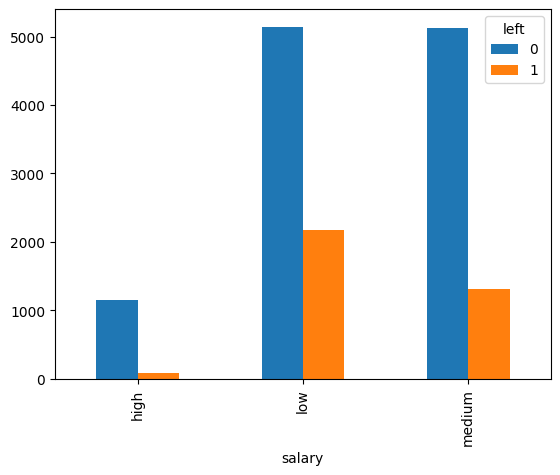

In [195]:
pd.crosstab(df_hr.salary,df_hr.left).plot(kind='bar')


<Axes: xlabel='Department'>

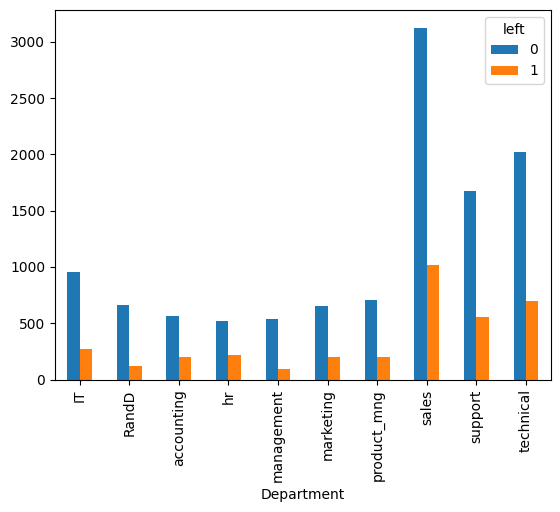

In [196]:
pd.crosstab(df_hr.Department,df_hr.left).plot(kind='bar')

In [198]:
subdf = df_hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [199]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")


In [200]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')


In [201]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [202]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [203]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [205]:
y = df_hr.left

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [237]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [238]:
model.fit(X_train, y_train)



LogisticRegression()

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the learned parameters
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model object
model2 = LogisticRegression()

# Train the model on the scaled training data
model2.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
predictions = model2.predict(X_test_scaled)


In [240]:
accuracy2 = model2.score(X_test_scaled, y_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy1 with no normalization {accuracy}")
print(f"Accuracy2 with normalization {accuracy2}")

Accuracy1 with no normalization 0.7795238095238095
Accuracy2 with normalization 0.7778095238095238


it is not really suggested to normlization with standard scaler in logistic regression

In [241]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])